## Assignment 12

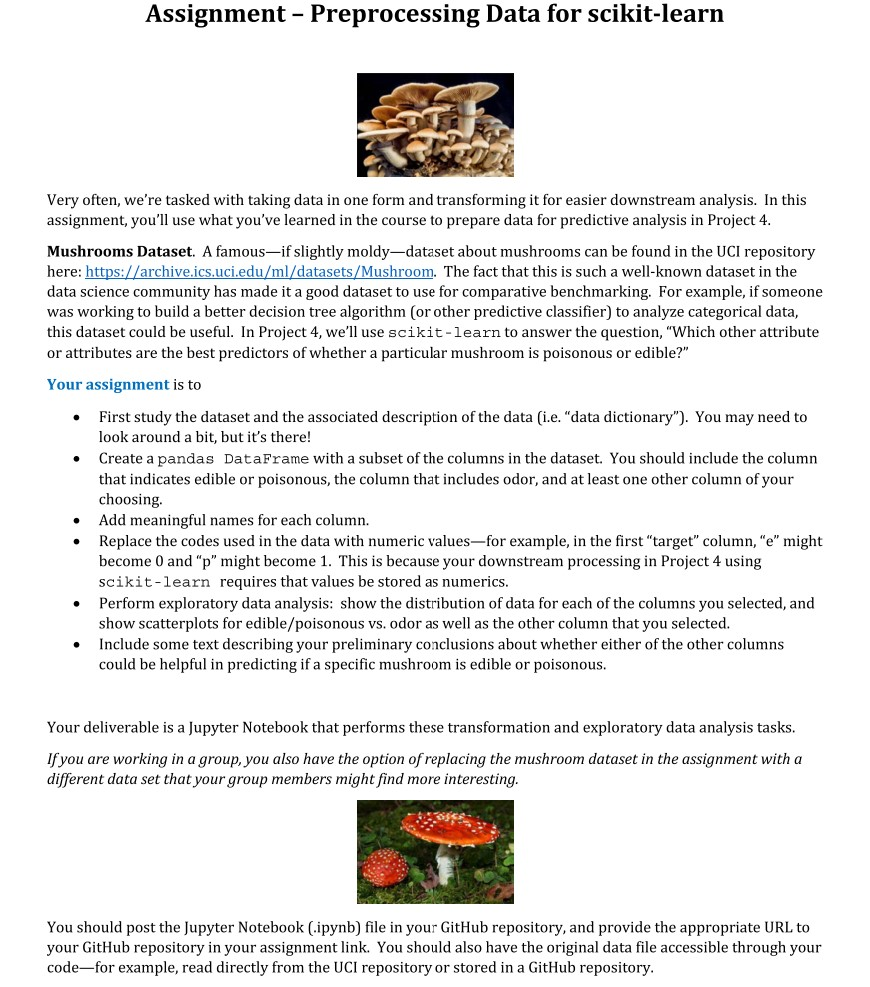

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!


In [2]:
import urllib.request
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names'
file = urllib.request.urlopen(url)

for line in file:
    decoded_line = line.decode("utf-8")
    print(decoded_line)

1. Title: Mushroom Database



2. Sources: 

    (a) Mushroom records drawn from The Audubon Society Field Guide to North

        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred

        A. Knopf

    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)

    (c) Date: 27 April 1987



3. Past Usage:

    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational

       Adjustment (Technical Report 87-19).  Doctoral disseration, Department

       of Information and Computer Science, University of California, Irvine.

       --- STAGGER: asymptoted to 95% classification accuracy after reviewing

           1000 instances.

    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity

       and Coverage in Incremental Concept Learning. In Proceedings of 

       the 5th International Conference on Machine Learning, 73-79.

       Ann Arbor, Michigan: Morgan Kaufmann.  

       -- approximately the same results with their HILLARY algor

### Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.

### Add meaningful names for each column.

In [3]:
mushroom_data = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',sep=',', header=None, usecols=[0,3,5], names=['Edibility','Cap_Color','Odor'])
mushroom_data 

,Edibility,Cap_Color,Odor
0,p,n,p
1,e,y,a
2,e,w,l
3,p,w,p
4,e,g,n
...,...,...,...
8119,e,n,n
8120,e,n,n
8121,e,n,n
8122,p,n,y


### Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.


In [4]:
replace_codes = mushroom_data.replace({'Edibility':{'e':0,'p':1},
    'Cap_Color':{'n':0,'b':1,'c':2,'g':3,'r':4,'p':5,'u':6,'e':7,'w':8,'y':9},
    'Odor':{'a':0,'l':1,'c':2,'y':3,'f':4,'m':5,'n':6,'p':7,'s':8}})
replace_codes.head(11)
      

,Edibility,Cap_Color,Odor
0,1,0,7
1,0,9,0
2,0,8,1
3,1,8,7
4,0,3,6
5,0,9,0
6,0,8,0
7,0,8,1
8,1,8,7
9,0,9,0


### Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected

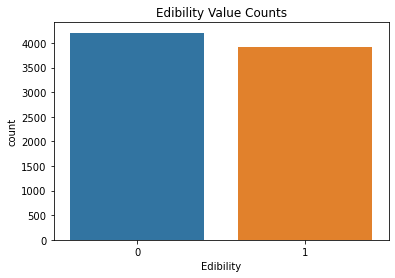

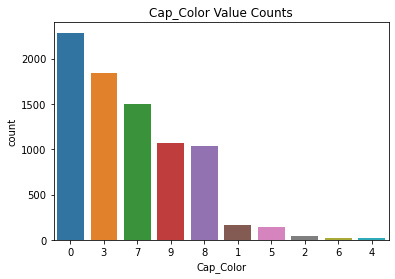

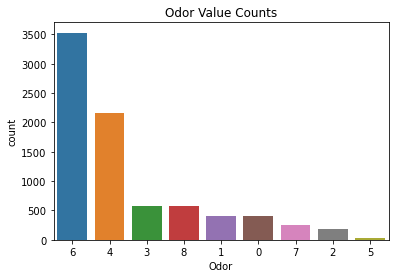

<Figure size 432x288 with 0 Axes>

In [5]:
columns = replace_codes.columns.tolist()

for column in columns:
  sns.countplot(x=replace_codes[column], order=replace_codes[column].value_counts().index)
  plt.title(f'{column} Value Counts')
  plt.show()
  plt.clf()

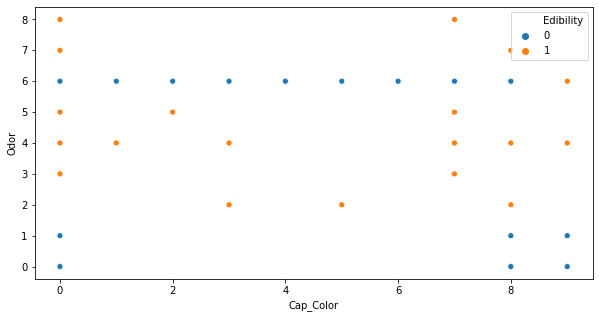

In [6]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=replace_codes, x='Cap_Color', y='Odor', hue='Edibility')

### Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

Analyzing the scatterplot, the hue indicates that the only cap colors of this data set that are edible are cap color 4 and 6, which are green and purple, respectively. The scatterplot indicates that Odors 0 and 1, almond and anise, respectively, do not seem to be poisonous.